<a href="https://colab.research.google.com/github/purnaa-l/ML-Examples/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset

In [5]:
dataset=pd.read_csv('/content/creditcard 2.csv')


In [7]:
dataset['Time'] = StandardScaler().fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))


In [15]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
#max_iter controls how many iterations the solver will run to converge.
#Logistic Regression is an iterative optimization algorithm, trying to minimize the loss function (log loss).
#Sometimes with complex data (especially imbalanced or noisy data), it takes more iterations to converge.
#The default is max_iter=100, which may not be enough. Setting it to 1000 ensures convergence.
#Fraud cases are very rare (typically <1%). Logistic Regression is sensitive to imbalance.
#Option A: Use class weights (preferred for Logistic Regression):

In [16]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [17]:
print(X.shape, X_train.shape, X_test.shape)


(284807, 30) (227845, 30) (56962, 30)


In [18]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [19]:
X_train_prediction=model.predict(X_train)
accuracy=accuracy_score(X_train_prediction, y_train)
print(accuracy)

0.9761592310562005


In [20]:
prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(prediction, y_test)
print(test_data_accuracy)

0.9754748779888347


In [39]:
input_data=(14,-5.40125766315825,-5.45014783420644,1.18630463143652,1.73623880012095,3.04910587764025,-1.76340557365201,-1.55973769907953,0.160841747266769,1.23308974041888,0.345172827050629,0.917229867699146,0.970116716069048,-0.266567764915222,-0.479129929276704,-0.526608502569153,0.47200411177674,-0.725480944982201,0.075081351540202,-0.406866573198217,-2.19684802485647,-0.503600328973703,0.984459785590244,2.45858857639219,0.0421188969891572,-0.481630823956716,-0.621272013713977,0.392053289557744,0.949594245504846,46.8)
scaler_time = StandardScaler()
scaler_amount = StandardScaler()
input_array = np.asarray(input_data).reshape(1, -1)

X['Time'] = scaler_time.fit_transform(X[['Time']])
X['Amount'] = scaler_amount.fit_transform(X[['Amount']])


In [40]:
# Scale Time
input_array[0, 0] = scaler_time.transform([[input_array[0, 0]]])[0][0]

# Scale Amount
input_array[0, -1] = scaler_amount.transform([[input_array[0, -1]]])[0][0]
prediction = model.predict(input_array)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
print(prediction)


[1]


In [47]:
# Only take 2 features for visualization
X = dataset[['V1', 'V2']].values
y = dataset['Class'].values


In [48]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<ipython-input-50-3768c2c7b6ae>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


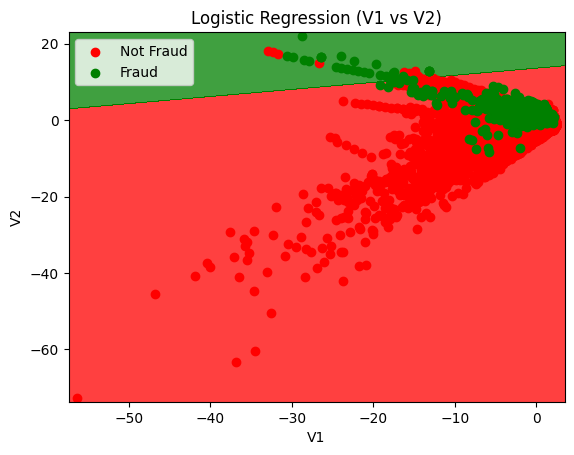

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Inverse transform for plotting purposes
X_set, y_set = sc_X.inverse_transform(X_train), y_train

# Create mesh grid
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

# Predict over grid
Z = model.predict(
    sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)
).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot actual points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['red', 'green'])(i), label='Fraud' if j == 1 else 'Not Fraud')

plt.title('Logistic Regression (V1 vs V2)')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()
